In [1]:
from causalml.inference.meta import BaseTRegressor as TLearner
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from Gen_data import SimulationStudy
from feature_importance import partial_dependence_plots

In [2]:
sim_lin: SimulationStudy = SimulationStudy(p=30, mean_correlation=0.5, cor_variance=0.2, n=5000, no_feat_cate=3, seed=220924)
simulation_linear = sim_lin.create_dataset()

sim_quad: SimulationStudy = SimulationStudy(p=30, mean_correlation=0.5, cor_variance=0.2, n=5000, no_feat_cate=3, non_linear='quadratic', seed=220924)
simulation_quadratic = sim_quad.create_dataset()

In [3]:
train_df, test_df = train_test_split(simulation_quadratic, random_state=220924, test_size=0.5)

In [4]:
x_col = [col for col in train_df.columns if col.startswith('X')]
X_train = train_df[x_col]
y_train = train_df['y']
T_train = train_df['T']

X_test = test_df[x_col]
y_test = test_df['y']
T_test = test_df['T']

In [5]:
nuisance_model = RandomForestRegressor(random_state=220924, n_estimators=1000, n_jobs=-1)
T_learner = TLearner(nuisance_model)
T_learner.fit(X=X_train, treatment=T_train, y=y_train)
tlearner_cate = T_learner.predict(X_test, treatment=T_test)
feat_importance = T_learner.get_importance(X=X_test, tau=tlearner_cate, features=x_col, model_tau_feature=nuisance_model)

In [6]:
important_feats = np.array(feat_importance[1].index.values)

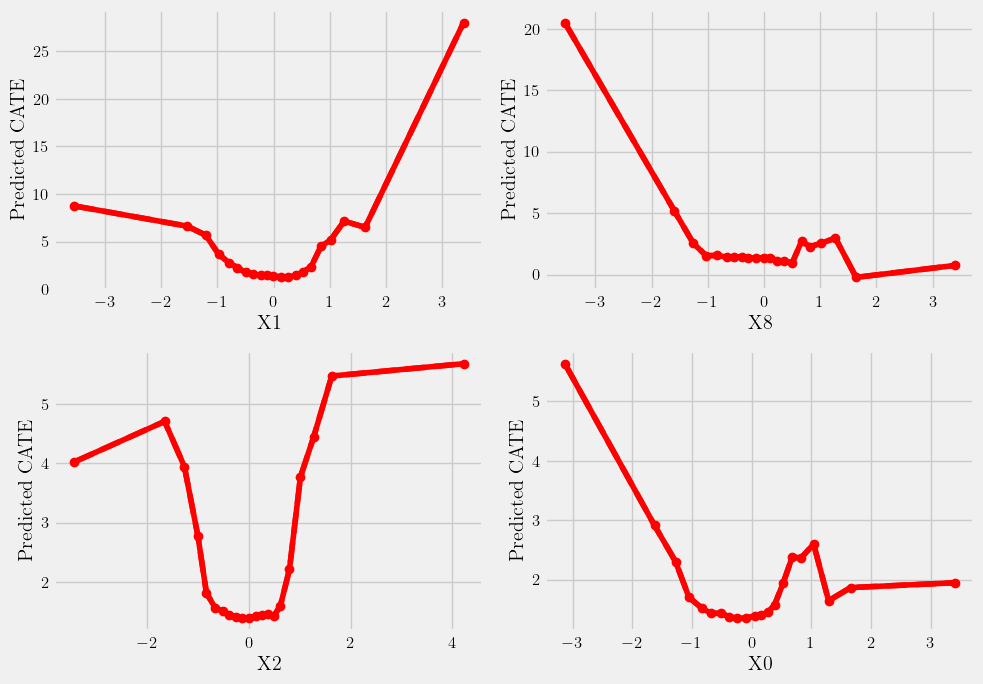

In [7]:
partial_dependence_plots(X_test, important_feats, est = T_learner)